In [1]:
from awrams.utils.nodegraph import nodes
from awrams.utils import datetools as dt
from awrams.utils import extents
from awrams.simulation import ondemand
from awrams.models import awral

In [2]:
mapping = awral.get_default_mapping()

In [3]:
def update_spatial_files(mapping):
    import os
    PATH_1K = '/data/cdc_cwd_wra/awra/AWRA_SCIENCE/CSIRO/2016-17 Deliverables/Spatial_Layers/'
    mapping.f_tree_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'F_Tree/1k/Mbg_f_tree_fin_1k.flt'))
    mapping.hveg_dr_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'ne/1k/Mbg_ne_filled_fin_1k.flt'))
    mapping.kdsat_v5_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'KdSat/1k/Mbg_kdsat_dnp_geo_mn_1km_filled.flt'))
    mapping.kssat_v5_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'KsSat/1k/Mbg_kssat_dnp_geo_mn_1km_filled.flt'))
    mapping.k0sat_v5_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'K0Sat/1k/Mbg_k0sat_dnp_geo_mn_1km_filled.flt'))
    mapping.k_gw_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'Kg/1k/Mbg_kg_filled_1k.flt'))
    mapping.lai_max_hrudr_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'LAImax_hruDR/1k/Mbg_laimax_dr_1k.flt'))
    mapping.laimax_hrudr = nodes.assign('lai_max_hrudr_grid')
    mapping.lai_max_hrusr_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'LAImax_hruSR/1k/Mbg_laimax_sr_1k.flt'))
    mapping.laimax_hrusr = nodes.assign('lai_max_hrusr_grid')
    mapping.meanpet_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'PETmean/1k/Mbg_dmean_apet_1970_2012_1k.flt'))
    mapping.ne_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'ne/1k/Mbg_ne_filled_fin_1k.flt'))
    mapping.pref_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'Pref/1k/Mbg_pref_1k.flt'))
    mapping.s0fracawc_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'S0AWC/1k/Mbg_s0awc_min_geo_mn_1km_filled.flt'))
    mapping.ssfracawc_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'SsAWC/1k/Mbg_ssawc_min_geo_mn_1km_filled.flt'))
    mapping.sdfracawc_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'SdAWC/1k/Mbg_sdawc_min_geo_mn_1km_filled.flt'))
    mapping.sdmax = nodes.mul('ssmax_scale', 'sdmax_scale','sdfracawc_grid',5000.)
    mapping.slope_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'Slope/1k/Mbg_slope_rad_1k.flt'))
    mapping.windspeed_grid = nodes.spatial_from_file(os.path.join(PATH_1K,'Wind_speed/1k/Mbg_windspeed_ann_1974_2015_1k.flt'))
    mapping.height_grid = nodes.hypsometric_from_multifile(os.path.join(PATH_1K,'Hyps_Layers/1k/*.flt'))

In [4]:
# Load some extents objects of varying resolutions

ref_5k = '/home/dshipman/SPATIAL_1K/Hyps_Layers/5k/Mbg_HypPerc_000_5k.flt'
e5k = extents.Extent.from_file(ref_5k)
ref_1k = '/home/dshipman/SPATIAL_1K/Hyps_Layers/1k/Mbg_HypPerc_000_1k.flt'
e1k = extents.Extent.from_file(ref_1k)

In [5]:
e1k

origin: -33.53,143.13, shape: (310, 660), cell_size: 0.01

In [6]:
e5k

origin: -33.55,143.15, shape: (62, 132), cell_size: 0.05

In [7]:
# Set up an OnDemandSimulator at 5k resolution

sim = ondemand.OnDemandSimulator(awral,mapping.mapping,extent=e5k)

In [8]:
extent = e5k#.ioffset[-200:,-200:]

In [9]:
m = sim.run(dt.dates('jan 2011'),extent,True)

In [10]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['figure.figsize'] = [12.0,8.0]

In [11]:
from awrams.utils.metatypes import ObjectDict as o

In [12]:
inputs = o([(k,v) for k,v in m[1].items() if isinstance(k,str)])
outputs = o([(k,v) for k,v in m[0].items() if isinstance(k,str)])

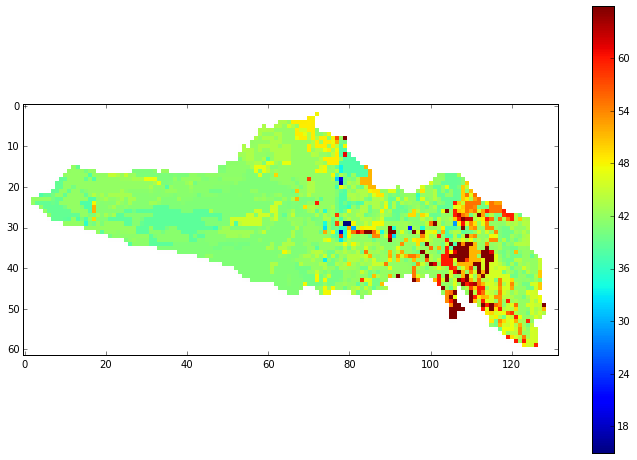

In [13]:
im = plt.imshow(nodes.get_expanded(inputs.s0max,extent.mask),interpolation='None')
plt.colorbar(im)

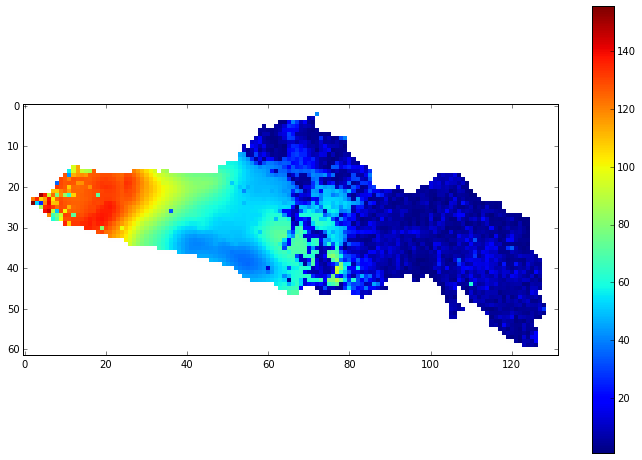

In [14]:
im = plt.imshow(nodes.get_expanded(outputs.qtot.sum(axis=0),extent.mask),interpolation='None')
plt.colorbar(im)

In [15]:
# Using the same mapping (ie still with 5k spatial data), set up a run at 1k resolution

sim = ondemand.OnDemandSimulator(awral,mapping.mapping,extent=e1k)
m = sim.run(dt.dates('jan 2011'),e1k,True)

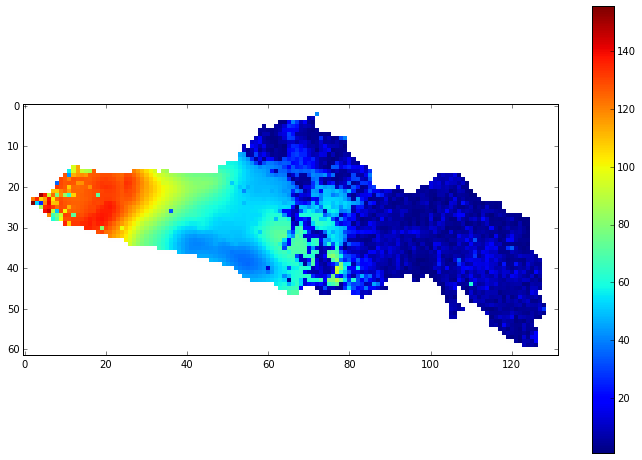

In [16]:
im = plt.imshow(nodes.get_expanded(outputs.qtot.sum(axis=0),extent.mask),interpolation='None')
plt.colorbar(im)

In [17]:
# Update spatial mapping to use 1k data

update_spatial_files(mapping.mapping)

In [18]:
extent = e1k

In [19]:
sim = ondemand.OnDemandSimulator(awral,mapping.mapping,extent=extent)
m = sim.run(dt.dates('jan 2011'),extent,True)

In [20]:
inputs = o([(k,v) for k,v in m[1].items() if isinstance(k,str)])
outputs = o([(k,v) for k,v in m[0].items() if isinstance(k,str)])

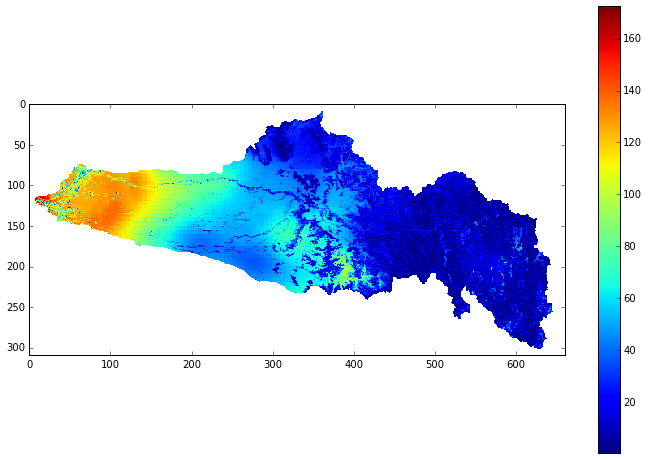

In [21]:
im = plt.imshow(nodes.get_expanded(outputs.qtot.sum(axis=0),extent.mask),interpolation='None')
plt.colorbar(im)

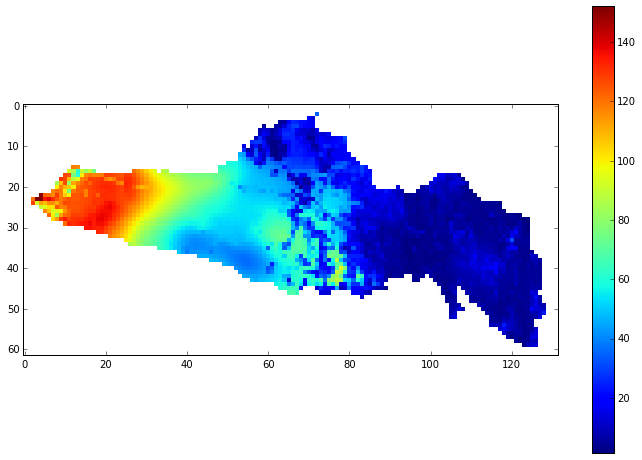

In [22]:
# Rerun using 1k input data, but at 5k resolution

extent = e5k
sim = ondemand.OnDemandSimulator(awral,mapping.mapping,extent=extent)
m = sim.run(dt.dates('jan 2011'),extent,True)
inputs = o([(k,v) for k,v in m[1].items() if isinstance(k,str)])
outputs = o([(k,v) for k,v in m[0].items() if isinstance(k,str)])

im = plt.imshow(nodes.get_expanded(outputs.qtot.sum(axis=0),extent.mask),interpolation='None')
plt.colorbar(im)